# Hierarchical Clustering

- 1) Her bir data point bir cluster olacak.
- 2) En yakin iki data pointi alıp bir cluster yap.
- 3) En yakin iki clusteri al bunlari tekb bir cluster yap.
- 4) Repeat 3

Distance mesafe: 
* euclidean distance: iki nokta arasi mesafe.
* 1) en yakin iki noktaya göre
* 2) en uzak iki noktaya gore 
* 3) mean'e gore
* 4) centroide gore

<strong>Dendogram:</strong> Her bir hierarcical clustering'in step'ini gosteren plottur.

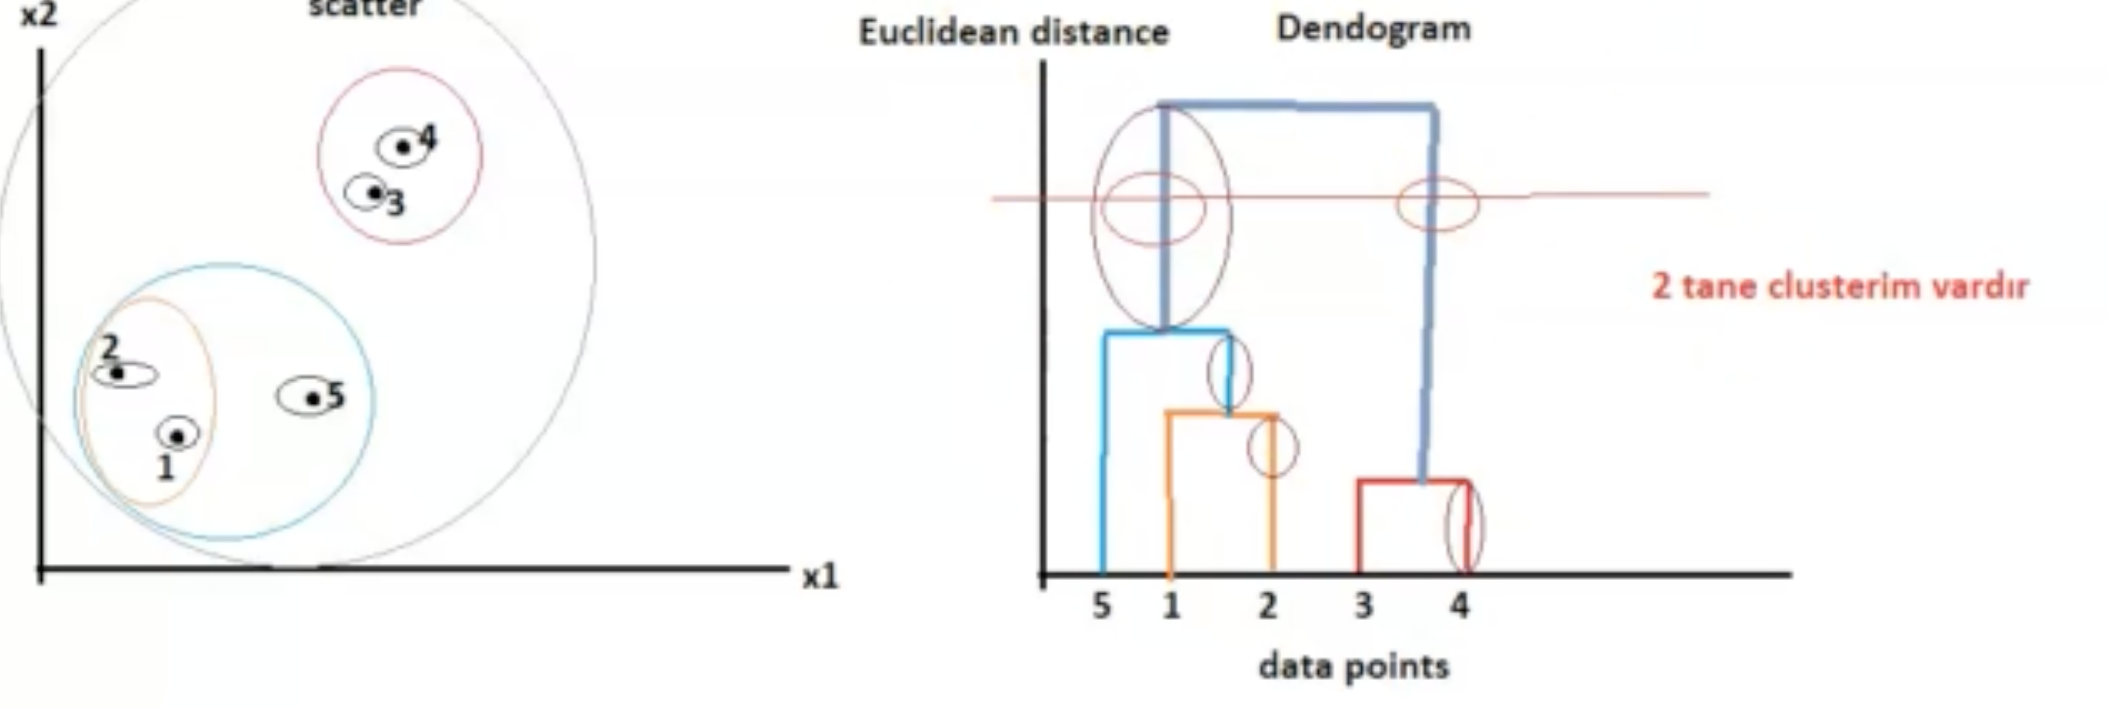

In [1]:
from IPython.display import Image
Image(filename='dg.png') 

- Bir threshold degeri belirlenir, thresholdu kesen kac tane nokta varsa o kadar cluster vardır
- Hicbir duzlem tarafindan kesilmeyen kenarlari isaretleriz, en cok uzunluga sahip olan isaretli bölge thresholdu belirler.
- Yukarıdaki gorselde 2 adet threshold oldugu gorulur.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#create dataset

#class1
x1=np.random.normal(25,5,100) 
y1=np.random.normal(25,5,100)

#class2
x2=np.random.normal(55,5,100) 
y2=np.random.normal(60,5,100)

#class3
x3=np.random.normal(55,5,100) 
y3=np.random.normal(15,5,100)

In [4]:
x = np.concatenate((x1,x2,x3), axis=0) #axis=0 yukarıdan assagiya birlestir

In [5]:
y= np.concatenate((y1,y2,y3), axis=0)

In [6]:
dictionary={"x":x,"y":y}

In [7]:
data=pd.DataFrame(dictionary)

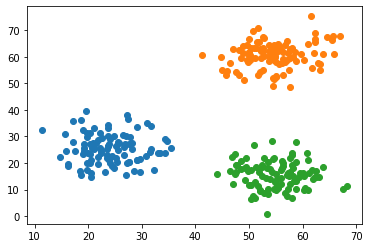

In [8]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

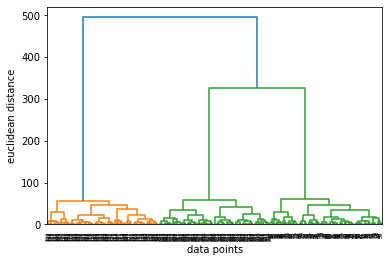

In [9]:
#dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(data, method="ward")
dendrogram(merg,leaf_rotation=90) #leaf_rotation: data point degerlerinin 90 derecelik aciyla yazilmasini saglar.
plt.ylabel("euclidean distance")
plt.xlabel("data points")
plt.show()

Ward Linkage: Minimum varyans degerine sahip olan kumeleri birlestirir.

- Bu dendrogram ile yesil cizgiye hicbir seyin kesmemesi ve uzunlugu bakimindan treshold cizilirse cluster sayisinin 3 olacagi gorulur

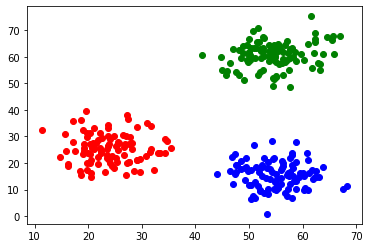

In [10]:
#HC
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity ="euclidean", linkage="ward" )
cluster=hc.fit_predict(data)
data["label"]=cluster

plt.scatter(data.x[data.label==0],data.y[data.label==0],color="red")
plt.scatter(data.x[data.label==1],data.y[data.label==1],color="green")
plt.scatter(data.x[data.label==2],data.y[data.label==2],color="blue")
plt.show()

- AgglomerativeClustering tumevarim gibi dusunulur, birbiriyle en alakali data pointleri cluster ederek tek bir clustera ulasma yontemine denir. 